In [ ]:
import autograd.numpy as np
from autograd import grad, jacobian
import autograd.numpy.random as npr

from matplotlib import pyplot as plt
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
nx = 10
ny = 10

dx = 1. / nx
dy = 1. / ny

x_space = np.linspace(0, 1, nx)
y_space = np.linspace(0, 1, ny)
print(x_space)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [ ]:
x_space = np.array(x_space)
y_space = np.array(y_space)
print(x_space)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


0.7357588823428847


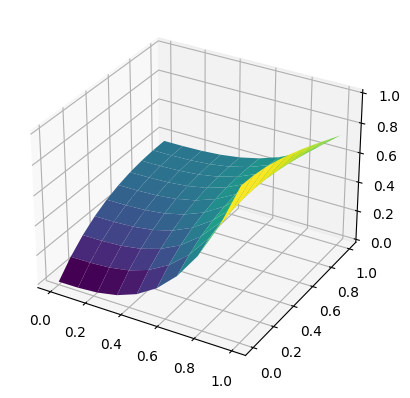

In [ ]:
import math
def analytic_solution(x):
    return  math.exp(-x[0])*(x[0] + x[1]**3)
surface = np.zeros((ny, nx))

for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        surface[i][j] = analytic_solution([x,y])

print(analytic_solution([1,1])       )
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot( projection='3d')  # Create a 3D subplot
X, Y = np.meshgrid(x_space, y_space)
surf = ax.plot_surface(X, Y, surface, rstride=1, cstride=1, cmap='viridis')

plt.show()


ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 2)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');


In [ ]:
import autograd.numpy as np
from autograd import grad


def f(x):
    return math.exp(-x[0])*((x[0]-2)+(x[1]**3)+(6*x[1]))

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

import math

def A(x):
    return ((1 - x[0]) * (x[1]**3)) + (x[0] * (1 + (x[1]**3)) * np.exp(-1)) + ((1 - x[1]) * x[0] * (np.exp(-x[0]) - np.exp(-1))) + (x[1] * (((1 + x[0]) * np.exp(-x[0])) - (1 - x[0] * np.exp(-1))))




def psy_trial(x, net_out):
    return A(x) + (x[0] * (1 - x[1]) * x[1] * (1 - x[1]) * net_out)


def loss_function(W, x, y):
    loss_sum = 0.

    for xi in x:
        for yi in y:

            input_point = np.array([xi, yi])

            net_out = neural_network(W, input_point)[0]

            net_out_jacobian = jacobian(neural_network_x)(input_point)
            net_out_hessian = jacobian(jacobian(neural_network_x))(input_point)

            psy_t = psy_trial(input_point, net_out)
            psy_t_jacobian = jacobian(psy_trial)(input_point, net_out)
            psy_t_hessian = jacobian(jacobian(psy_trial))(input_point, net_out)

            gradient_of_trial_d2x = psy_t_hessian[0][0]
            gradient_of_trial_d2y = psy_t_hessian[1][1]

            func = f(input_point) # right part function

            err_sqr = ((gradient_of_trial_d2x + gradient_of_trial_d2y) - func)**2
            loss_sum += err_sqr

    return loss_sum

In [ ]:
W

[array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]),
 array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]])]

In [ ]:
import autograd.numpy as np
from autograd import grad
W = [npr.randn(2, 10), npr.randn(10, 1)]
lmb = 0.03

print (neural_network(W, np.array([1, 1])))

for i in range(10):
    loss_grad =  grad(loss_function)(W, x_space, y_space)
    print(loss_grad)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]
    print ('loss',loss_function(W, x_space, y_space))

[1.90443395]
[array([[  57.72904833,    8.66520345,   29.32717636,   88.38749192,
         144.43985728,    7.00009804,  -35.13355697, -114.73341175,
          21.37561444,   71.52391946],
       [  20.70183173,    2.85102161,   10.83827954,   30.16051038,
          48.52124798,    1.89019302,  -11.93892439,  -39.44145452,
           6.70946904,   24.48587409]]), array([[200.13556112],
       [418.04927246],
       [391.91021046],
       [236.91853602],
       [308.67541024],
       [190.39347732],
       [350.35311232],
       [204.51184951],
       [263.00274991],
       [305.07612384]])]
loss 249596.11818052782
[array([[ 4998.02680433, 22837.49404308, 27786.55641073,  4095.19149327,
         2534.02372982, 12048.26457521, 14816.91140142,  4979.83193652,
        16879.54760617, 11667.1181265 ],
       [ 2178.71741239,  6747.05179007,  8481.01705406,  1195.54651393,
          627.39731966,  2837.02978541,  4268.43550478,  1148.3971141 ,
         5503.07083346,  2871.27517831]]), array

/usr/local/lib/python3.10/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/usr/local/lib/python3.10/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)
/usr/local/lib/python3.10/dist-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: invalid value encountered in true_divide
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/usr/loc

loss 10.86505775210613
[array([[ 9.56813500e-11,             nan,             nan,
        -2.70344036e-09, -1.57639008e-06,  2.43356165e-20,
         7.97925812e-24, -5.82471381e-09,  2.52053051e-27,
         3.89815243e-20],
       [-1.44242815e-11,             nan,             nan,
        -4.17962956e-09, -1.94453447e-06, -2.74331365e-22,
        -9.19403031e-28, -7.86015715e-09, -5.11654023e-33,
        -4.10229612e-22]]), array([[ 1.96734041e-11],
       [ 5.43094753e-37],
       [ 3.41655165e-44],
       [-9.00494235e-10],
       [-1.49064058e-06],
       [ 1.82057950e-21],
       [ 2.36122809e-25],
       [-1.53030557e-10],
       [ 1.75446109e-28],
       [ 5.71013284e-21]])]
loss nan


KeyboardInterrupt: ignored

19.151417719455427
[0.17794165 0.17904005 0.18672889 0.20759859 0.24823958 0.3152423
 0.41519717 0.55469463 0.74032512 0.97867905]
[0.17794165 0.18792493 0.19170975 0.20636123 0.24246007 0.30794966
 0.40983633 0.55488885 0.7498913  1.00170979]


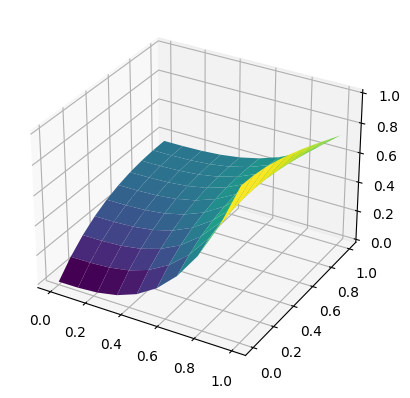

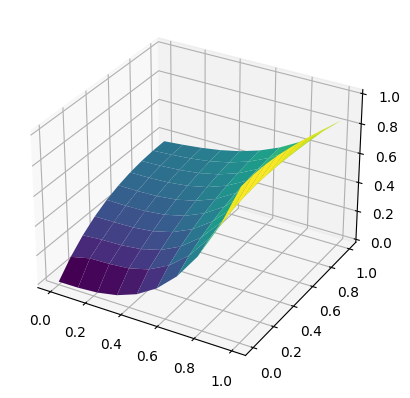

In [ ]:
print (loss_function(W, x_space, y_space))

surface2 = np.zeros((ny, nx))
surface = np.zeros((ny, nx))

for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        surface[i][j] = analytic_solution([x, y])

for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        net_outt = neural_network(W, [x, y])[0]
        surface2[i][j] = psy_trial([x, y], net_outt)



print (surface[2])
print (surface2[2])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot( projection='3d')  # Create a 3D subplot
X, Y = np.meshgrid(x_space, y_space)
surf = ax.plot_surface(X, Y, surface, rstride=1, cstride=1, cmap='viridis')

plt.show()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 3)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

fig = plt.figure()
ax = fig.add_subplot( projection='3d')  # Create a 3D subplot
X, Y = np.meshgrid(x_space, y_space)
surf = ax.plot_surface(X, Y, surface2, rstride=1, cstride=1, cmap='viridis')

plt.show()

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 3)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');






In [ ]:
W

[array([[-24.22012401, -23.85135466, -23.44380338, -12.22940465,
         -11.87927462, -23.82913098, -25.17635633, -11.80873106,
         -14.23487258, -12.12244811],
        [ -7.37496009,  -7.31562211,  -5.29156205,  -4.25294474,
          -2.58725399,  -7.49861055,  -5.56305589,  -4.07144246,
          -5.2885028 ,  -2.85863855]]),
 array([[-14.02694757],
        [-14.89390691],
        [-13.8112238 ],
        [  2.31643758],
        [  7.94150591],
        [-13.51906653],
        [-18.4197705 ],
        [  3.16374488],
        [ -0.6871178 ],
        [  3.44250719]])]

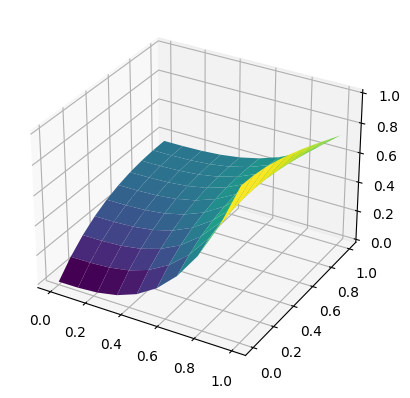

In [ ]:

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.exp(-x)*(x + y**3)

surface = np.zeros((10, 10))
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)

for i, xi in enumerate(x):
    for j, yi in enumerate(y):

        surface[i][j] = f(xi, yi)

# x and y axis
#previous model graph
# print(surface[1][1])
# print(f(1,1))

# fig = plt.figure()
# ax = fig.add_subplot( projection='3d')  # Create a 3D subplot
# X, Y = np.meshgrid(x, y)
# Z = f(X,Y)
# surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
# plt.show()


fig = plt.figure()
ax = fig.add_subplot( projection='3d')  # Create a 3D subplot
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, surface, rstride=1, cstride=1, cmap='viridis')
plt.show()


In [ ]:
print (psy_trial([1,0],net_outt))
print(f(1,0))
print(surface[1])
print(analytic_solution([1, 0]))

0.36787944117144233
0.36787944117144233
[0.09942659 0.10065408 0.1092465  0.13256879 0.17798587 0.25286269
 0.36456417 0.52045524 0.72790084 0.99426591]
0.36787944117144233


In [ ]:
print(Z)
print(f(1,0))
# for i, xi in enumerate(x):
#     for j, yi in enumerate(y):
#         print(xi,'---',yi)


# surface[i][j] = f(xi, yi)

[[0.         0.09942659 0.17794165 0.23884377 0.28496906 0.3187519
  0.34227808 0.3573312  0.36543315 0.36787944]
 [0.00137174 0.10065408 0.17904005 0.23982667 0.2858486  0.31953894
  0.34298236 0.35796141 0.36599709 0.36838408]
 [0.01097394 0.1092465  0.18672889 0.24670694 0.29200533 0.32504823
  0.34791229 0.36237291 0.36994467 0.37191653]
 [0.03703704 0.13256879 0.20759859 0.26538197 0.30871648 0.34000203
  0.36129353 0.37434697 0.38065953 0.38150461]
 [0.0877915  0.17798587 0.24823958 0.30174913 0.34125925 0.36912257
  0.38735174 0.39766488 0.40152531 0.40017613]
 [0.17146776 0.25286269 0.3152423  0.36170579 0.39491083 0.41713212
  0.43031256 0.43610792 0.43592565 0.43095891]
 [0.2962963  0.36456417 0.41519717 0.45114934 0.47494844 0.48875291
  0.49440167 0.49345737 0.4872442  0.47688076]
 [0.47050754 0.52045524 0.55469463 0.57597716 0.58664927 0.58870721
  0.58384471 0.57349451 0.55886458 0.54096949]
 [0.70233196 0.72790084 0.74032512 0.74208661 0.73529054 0.72171727
  0.70286733 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.38777878e-17  3.04951315e-02  2.60581714e-02  1.44685636e-02
   4.71336034e-03 -1.00919334e-03 -2.72352776e-03 -9.51571073e-04
   3.86803972e-03  1.15153693e-02]
 [ 0.00000000e+00  8.88488141e-03  4.98085844e-03 -1.23735488e-03
  -5.77951238e-03 -7.29264120e-03 -5.36084452e-03  1.94215202e-04
   9.56618551e-03  2.30307386e-02]
 [ 0.00000000e+00 -1.27512561e-04 -3.81478761e-03 -7.34853397e-03
  -9.02330433e-03 -7.96071189e-03 -3.58005686e-03  4.62222024e-03
   1.71533582e-02  3.45461078e-02]
 [ 0.00000000e+00 -2.28810411e-03 -5.11406265e-03 -6.95501248e-03
  -6.85590018e-03 -4.09608115e-03  1.96047189e-03  1.19277452e-02
   2.64206908e-02  4.60614771e-02]
 [ 0.00000000e+00 -1.53629000e-03 -2.76923776e-03 -2.84577184e-03
  -1.06421738e-03  3.21456265e-03  1.06071132e-02  2.17240867e-02
   3.71763880e-02  5.75768464e-02

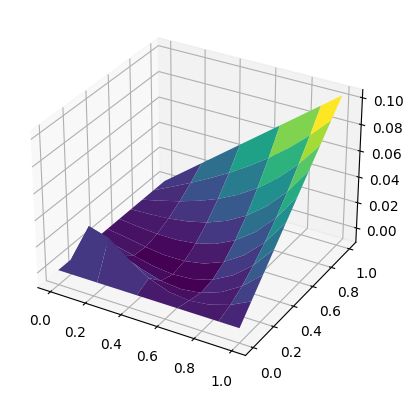

In [ ]:
surfacex=surface2-surface
print(surfacex)
fig = plt.figure()
ax = fig.add_subplot( projection='3d')  # Create a 3D subplot
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X,Y,surfacex, rstride=1, cstride=2, cmap='viridis')
plt.show()


In [ ]:
surfacex[5]

array([ 0.        , -0.00153629, -0.00276924, -0.00284577, -0.00106422,
        0.00321456,  0.01060711,  0.02172409,  0.03717639,  0.05757685])